醫材保養統計 (2021/01/01 ~ 2024/01/19)

In [107]:
# 未保養醫材總件數
import pandas as pd
maintain_path = 'E:/Python Practice/QRcode/保養名單rawdata (20110101-20140119.xlsx'
total_eqipath = 'E:/Python Practice/QRcode/20240119設備清單.xlsx'
df_maintain = pd.read_excel(maintain_path, engine='openpyxl')
df_eqitotal = pd.read_excel(total_eqipath, engine='openpyxl')

maintain_total = len(df_maintain)
print(f'保養名單共{maintain_total}件')
missing_eqinumber = df_maintain['保養結果'].isnull().sum()
print(f'近三年共{missing_eqinumber}件醫材(次數)沒有保養紀錄')

保養名單共18175件
近三年共4236件醫材(次數)沒有保養紀錄


In [108]:
# 風險等級分類
eqirank_dict = df_eqitotal[['財產編號', '風險等級']].set_index('財產編號')['風險等級'].to_dict() # 用設備總表對照

# 保養df 併入"風險等級""
df_maintain = df_maintain[['表單編號','財產編號','儀器名稱','成本中心名稱','保養結果','保養描述']] 
df_maintain.loc[:, '風險等級'] = None
df_maintain['風險等級'] = df_maintain['財產編號'].map(eqirank_dict).fillna('未知風險')

# 資料型態整理 
df_maintain['財產編號'] = df_maintain['財產編號'].astype(str)
df_maintain['表單編號'] = df_maintain['表單編號'].astype(str)

# 填補遺失值
df_maintain['保養結果'] = df_maintain['保養結果'].fillna('保養未完成')

preresult = df_maintain['保養結果'].value_counts() # 分類前

In [ ]:
# 存檔：保養清單raw data + 風險等級
output_path = 'E:/Python Practice/QRcode/財產編號+風險等級.xlsx'
df_maintain.to_excel(output_path, index=False)

In [109]:
# 保養結果分類
df_maintain.loc[df_maintain['保養結果'].isin(['異常處理', '退件']), '保養結果'] = '保養未完成'
df_maintain.loc[df_maintain['保養結果'].isin(['功能正常', '預防處理','維修時保養']), '保養結果'] = '保養已完成'

result = df_maintain['保養結果'].value_counts()
print("Before reclassification:\n", preresult)
print("\nAfter reclassification:\n", result)

Before reclassification:
 保養結果
功能正常     13717
保養未完成     4236
異常處理       119
退件          69
預防處理        31
維修時保養        3
Name: count, dtype: int64

After reclassification:
 保養結果
保養已完成    13751
保養未完成     4424
Name: count, dtype: int64


In [110]:
# 暫時忽略等級風險未知的醫材
unknown_rank = df_maintain[df_maintain['風險等級'] == '未知風險']
print(f'有{unknown_rank.shape[0]}筆醫材的風險等級未知')

# 刪除沒有風險等級的醫材
maintain_onlyrank = df_maintain[df_maintain['風險等級'] != '未知風險']
print(f'有風險等級的保養清單共有{len(maintain_onlyrank )}件')

# df 整理
maintain_onlyrank  = maintain_onlyrank .sort_values(by='表單編號', ascending=False) # 日期排序
maintain_onlyrank  = maintain_onlyrank .reset_index(drop=True)  # 刪除 index
maintain_onlyrank['保養結果'].value_counts()

有1047筆醫材的風險等級未知
有風險等級的保養清單共有17128件


保養結果
保養已完成    12946
保養未完成     4182
Name: count, dtype: int64

In [145]:
# function：依照風險等級分類
import matplotlib.pyplot as plt
from pylab import matplotlib

# 中文字體
matplotlib.rcParams['font.family'] = ['MingLiU', 'sans-serif']

# 依照風險等級分類
def plot_maintenance_results(df, risk_level):
    df_filtered = df[df['風險等級'] == risk_level]
    result_counts = df_filtered['保養結果'].value_counts()
        
    # 圓圈圖
    plt.figure(figsize=(12,12))
    plt.pie(result_counts,
            radius=1.25,
            counterclock=True,
            startangle=60,
            # autopct='%.2f%%',
            autopct=lambda p: f'{p:.2f}%\n({int(round(p * sum(result_counts) / 100))}件)',
            textprops={'color':'black','weight':'bold','size':17.5},
            pctdistance=0.875,
            wedgeprops={'linewidth':3,'edgecolor':'w','width':0.3})
    
    # 圖表標題
    plt.title(f'{risk_level} 級風險保養結果統計', fontsize=25, y=1.05)
    x =['已保養','未保養']
    plt.legend(x, loc="upper right",fontsize=15)
    plt.show()

測試

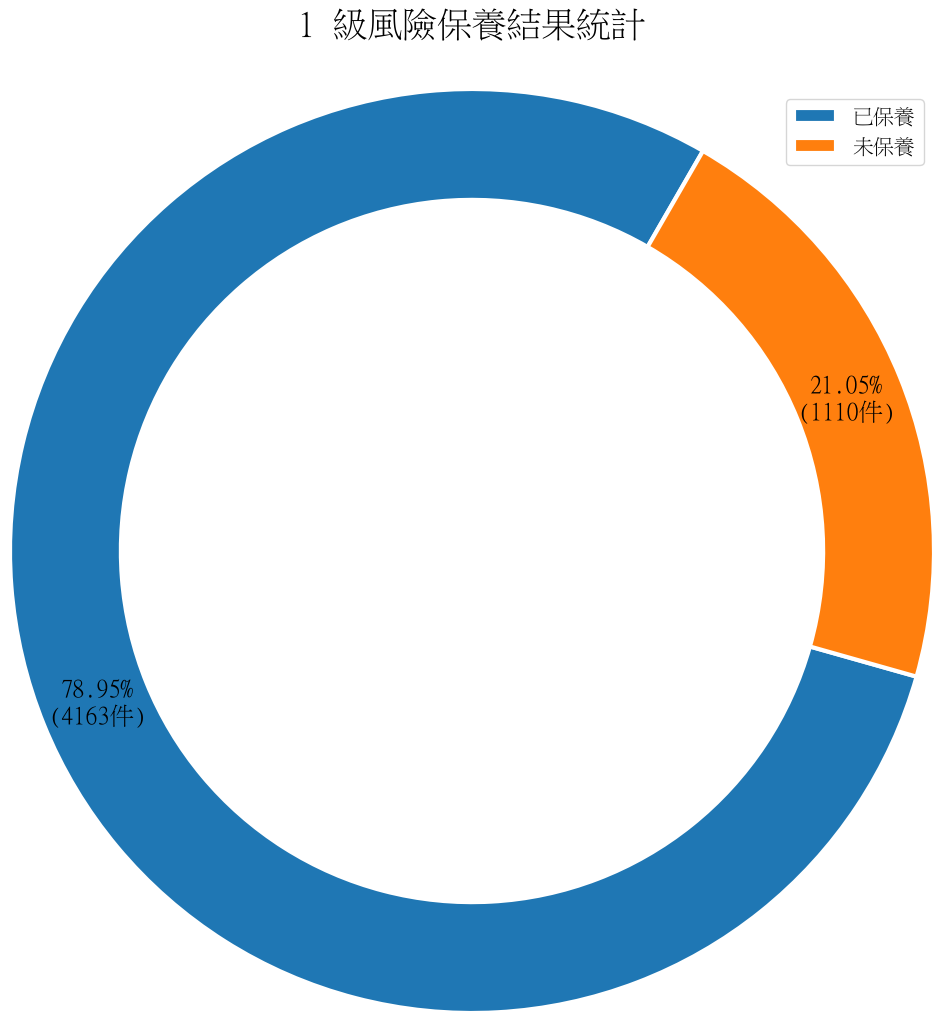

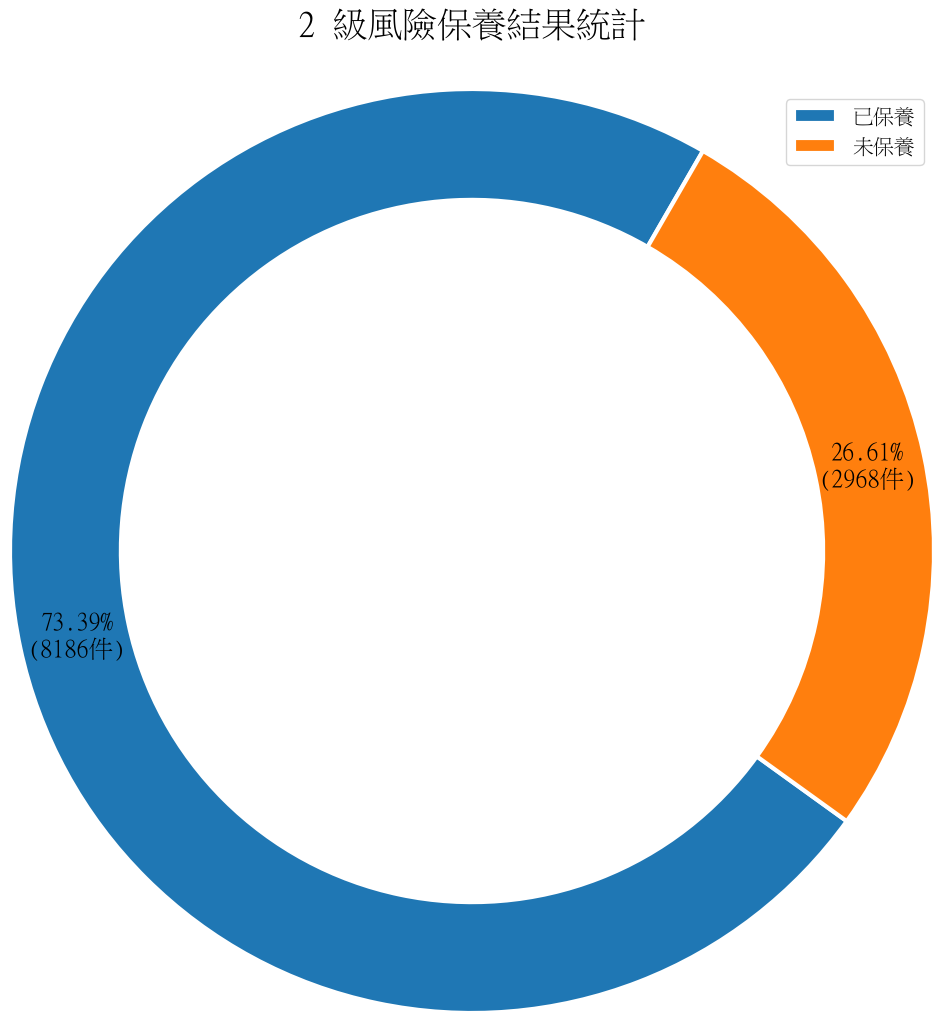

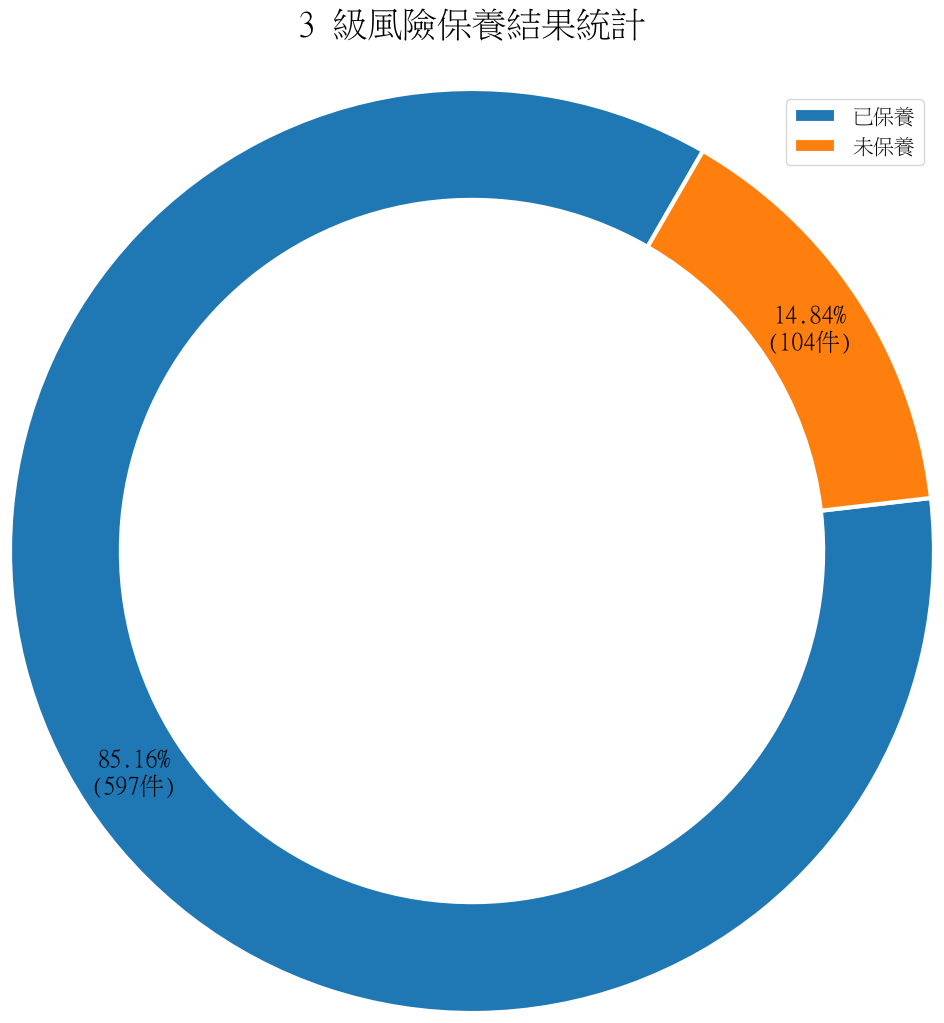

In [146]:
plot_maintenance_results(maintain_onlyrank, risk_level=1) # 一級
plot_maintenance_results(maintain_onlyrank, risk_level=2) # 二級
plot_maintenance_results(maintain_onlyrank, risk_level=3) # 三級

In [94]:
print(len(maintain_onlyrank[maintain_onlyrank['風險等級'] == 1]))
print(len(maintain_onlyrank[maintain_onlyrank['風險等級'] == 2]))
print(len(maintain_onlyrank[maintain_onlyrank['風險等級'] == 3]))

5273
11154
701


分析各單位，醫材保養缺失情況

In [92]:
place = maintain_onlyrank['成本中心名稱'].unique()
eqi_num = len(place)
print(f'保養清單的個成本中心種類共有{eqi_num}種')
place

保養清單的個成本中心種類共有79種


array(['6269 - ９樓病房', '6250 - 加護病房', '4130 - 呼吸治療室', '4140 - 心導管室',
       '4610 - 眼科', '6265 - ５樓病房', '4630 - 復健治療室', '6267 - ７樓病房',
       '4621 - 聽語中心', '4500 - 牙科', '4640 - 皮膚科', '6220 - 手術室',
       '4300 - 小兒科部', '6212 - 急診室', '6268 - ８樓病房', '4910 - 麻醉科',
       '4921 - 檢驗科', '4111 - 消化醫療中心', '6400 - 透析中心', '6210 - 門診護理',
       '4200 - 一般外科', '5302 - 運動中心', '4920 - 病理中心', '5110 - 藥劑科',
       '6230 - 待產房', '6266 - ６樓病房', '4390 - 新生兒加護病房', '4927 - 檢驗科-血庫',
       '4290 - 泌尿科', '4400 - 婦產科', '4620 - 耳鼻喉科', '4204 - 大腸直腸外科',
       '8800 - 美容醫學中心', '2321 - 中央供應室', '2410 - 健診中心', '4928 - 檢驗科-細菌',
       '4180 - 家醫科', '6240 - 嬰兒室', '62682- 產後護理之家', '4210 - 骨科',
       '5200 - 營養課', '4240 - 整形外科', '4612 - 眼科開刀房', '3120 - 國際特診中心',
       '4440 - 生殖醫學中心', '4141 - 週邊血管中心', '4100 - 內科部', '4404 - 泌尿功能治療中心',
       '4007 - 醫工課', '4930 - 影像醫學科', '4291 - 震波碎石室', '4690 - 兒童發展復健中心',
       '4209 - 乳房中心', '4120 - 心臟功能檢查室', '4660 - 急診科', '5600 - 社區醫學部',
       '5607 - 安寧居家照護', '4174 - 肌電圖室', '5608

In [111]:
# 單位分類整理 
# 刪除'2414 - 臺安診所'(不在醫工課管轄範圍)、0006 - JCI評鑑專案經費'

# 護理部
DHN = ['6265 - ５樓病房','6266 - ６樓病房','6267 - ７樓病房','6268 - ８樓病房','6269 - ９樓病房','6210 - 門診護理',
       '2321 - 中央供應室','6230 - 待產房','6240 - 嬰兒室','6250 - 加護病房','6220 - 手術室','6400 - 透析中心',
       '4390 - 新生兒加護病房','6212 - 急診室','62682- 產後護理之家','4612 - 眼科開刀房','5607 - 安寧居家照護',
       '4310 - 兒科檢查室','4006 - 居家護理組','6500 - 精神科日間病房'] # 急診護理(綱架表) = 急診室(系統)

# 醫療技術部
TECH = ['4175 - 神經生理檢查室','4404 - 泌尿功能治療中心','4130 - 呼吸治療室',
        '4140 - 心導管室','4630 - 復健治療室','4621 - 聽語中心','4111 - 消化醫療中心','4920 - 病理中心','8800 - 美容醫學中心',
       '4291 - 震波碎石室','4209 - 乳房中心','4120 - 心臟功能檢查室','4690 - 兒童發展復健中心',
        '4141 - 週邊血管中心','5600 - 社區醫學部','4409 - 婦產科超音波室','4430 - 循環稀有細胞暨基因檢測實驗室',
        '4174 - 肌電圖室','4650 - 身心科','4009 - 腦波室']

# 醫療技術部_檢驗科
TECH_check = [ '4921 - 檢驗科','4927 - 檢驗科-血庫','4928 - 檢驗科-細菌','4926 - 檢驗科-門診', '4923 - 檢驗科-生化', 
              '4925 - 檢驗科-血清','4924 - 檢驗科-血液']

# 醫療技術部_健診中心
TECH_health = ['2410 - 健診中心']

# 醫療技術部_醫工課
TECH_BME = ['4007 - 醫工課']

# 醫務部
Dept = ['4610 - 眼科','4640 - 皮膚科','4910 - 麻醉科','4620 - 耳鼻喉科','4180 - 家醫科','4930 - 影像醫學科','4632 - 復健科',
        '4660 - 急診科','3120 - 國際特診中心','5110 - 藥劑科','5111 - 藥庫','4100 - 內科部','4200 - 一般外科','4290 - 泌尿科',
        '4204 - 大腸直腸外科','4210 - 骨科','4240 - 整形外科','4280 - 外科部','4300 - 小兒科部','4400 - 婦產科', 
        '4440 - 生殖醫學中心','4450 - 婦產科海芙刀','4500 - 牙科']

# 健康發展處
health_develope = ['5302 - 運動中心','5200 - 營養課','4108 - 戒菸衛教組','5608 - 高血壓衛教組','2401A- 專注力中心']

# 財務處
financial = ['2320 - 資材(保管)']

In [106]:
print(len(DHN))
print(len(TECH))
print(len(TECH_check))
print(len(TECH_health))
print(len(TECH_BME))
print(len(Dept))
print(len(health_develope))
print(len(financial))

20
20
7
1
1
23
5
1


In [112]:
# 函式：更新各單位名稱
def place_renew(df, department_name, department_list):
    condition = df['成本中心名稱'].isin(department_list)
    df.loc[condition, '成本中心名稱'] = department_name
    return df

maintain_onlyrank_dept = place_renew(maintain_onlyrank,'護理部',DHN)
maintain_onlyrank_dept = place_renew(maintain_onlyrank,'醫療技術部',TECH)
maintain_onlyrank_dept = place_renew(maintain_onlyrank,'醫療技術部_檢驗科',TECH_check)
maintain_onlyrank_dept= place_renew(maintain_onlyrank,'醫療技術部_健診中心',TECH_health)
maintain_onlyrank_dept= place_renew(maintain_onlyrank,'醫療技術部_醫工課',TECH_BME)
maintain_onlyrank_dept = place_renew(maintain_onlyrank,'醫務部',Dept)
maintain_onlyrank_dept = place_renew(maintain_onlyrank,'健康發展處',health_develope)
maintain_onlyrank_dept = place_renew(maintain_onlyrank,'財務處',financial)

maintain_onlyrank_dept.head(5)

,表單編號,財產編號,儀器名稱,成本中心名稱,保養結果,保養描述,風險等級
0,113010413,202310003000,TOP輸液幫浦(含點滴架),護理部,保養未完成,NaN,2.0
1,113010412,202310002900,充氣式加溫器(含掛架),護理部,保養未完成,NaN,2.0
2,113010411,202310001100,Trilogy EVO呼吸器(含推車),醫療技術部,保養未完成,NaN,3.0
3,113010410,202310001000,Trilogy EVO呼吸器(含推車),醫療技術部,保養未完成,NaN,3.0
4,113010409,202308001400,ACCRIVA全血氧分析儀,醫療技術部,保養未完成,NaN,2.0


In [113]:
#  刪除不要的單位
maintain_onlyrank_dept = maintain_onlyrank_dept[~((maintain_onlyrank_dept['成本中心名稱'] == '2414 - 臺安診所') | (maintain_onlyrank_dept['成本中心名稱'] == '0006 - JCI評鑑專案經費'))]

In [162]:
# function：依照風險等級分類
import matplotlib.pyplot as plt
import numpy as np
from pylab import matplotlib
from collections import Counter
from matplotlib.patches import Patch

# 中文字體
matplotlib.rcParams['font.family'] = ['MingLiU', 'sans-serif']

# 依照風險等級分類
def plot_maintenance_results(df, risk_level):
    df_filtered = df[df['風險等級'] == risk_level]

    # 計算各項目的占比
    dept_array = df_filtered['成本中心名稱'].values.flatten() # 獲得成本中心名稱清單
    dept_num = Counter(dept_array)
    dept_dict = dict(dept_num)
    print(f'{risk_level}級醫材：各部門保養缺失數量：\n{dept_dict}\n')

    # 計算每個成本中心的占比
    dept_sum = sum(dept_dict.values())
    print(f'{risk_level}級醫材共有{dept_sum}件保養紀錄缺失')
    key_counts = {key: count / dept_sum for key, count in dept_dict.items()}  

    # 將占比小於 5% 的項目合併至 "其他"
    threshold = 0.05
    other_percentage = 0
    keys_to_remove = []

    for key, percentage in key_counts.items():
        if percentage < threshold:
            other_percentage += percentage
            keys_to_remove.append(key)
    key_counts['其他'] = other_percentage

    # 刪除占比 <5% 的成本中心
    for key in keys_to_remove:
        del key_counts[key]
    

    # 圓圈圖
    plt.figure(figsize=(12,12))
    plt.pie(key_counts.values(), 
            radius=1,
            counterclock=True,
            startangle=60,
            # autopct='%.1f%%',
            autopct=lambda p: f'{p:.1f}%\n({int(round(p * dept_sum / 100))}件)',
            textprops={'color':'black','weight':'bold','size':20},
            pctdistance=0.85,
            wedgeprops={'linewidth':3,'edgecolor':'w','width':0.3})
    
    # 圖表標題
    plt.title(f'{risk_level} 級風險醫療器材_保養缺失統計', fontsize=30)
    plt.legend(key_counts.keys(), loc="upper right",fontsize=15)
    plt.show()

1級醫材：各部門保養缺失數量：
{'醫務部': 1199, '醫療技術部': 894, '護理部': 2792, '醫療技術部_檢驗科': 200, '醫療技術部_健診中心': 86, '健康發展處': 24, '醫療技術部_醫工課': 72, '財務處': 3}

1級醫材共有5270件保養紀錄缺失


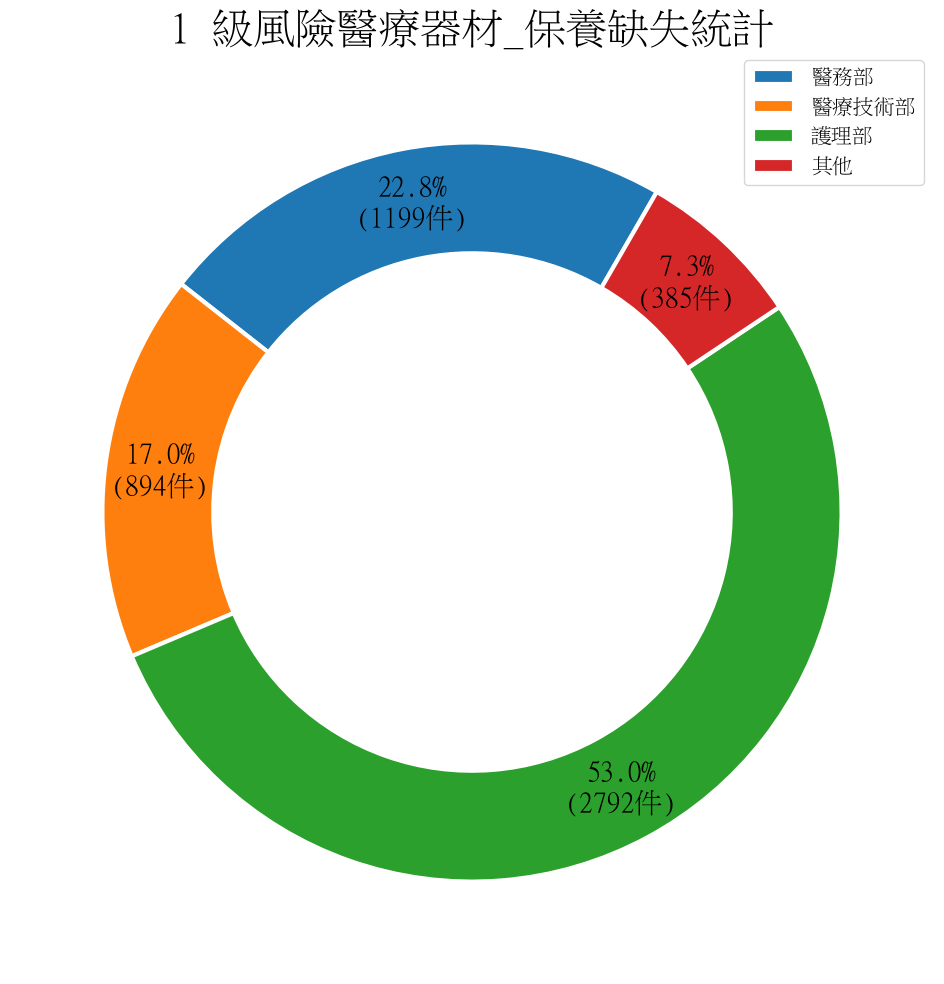

2級醫材：各部門保養缺失數量：
{'護理部': 5819, '醫療技術部': 2099, '醫務部': 2272, '醫療技術部_檢驗科': 545, '健康發展處': 108, '醫療技術部_健診中心': 243, '醫療技術部_醫工課': 49}

2級醫材共有11135件保養紀錄缺失


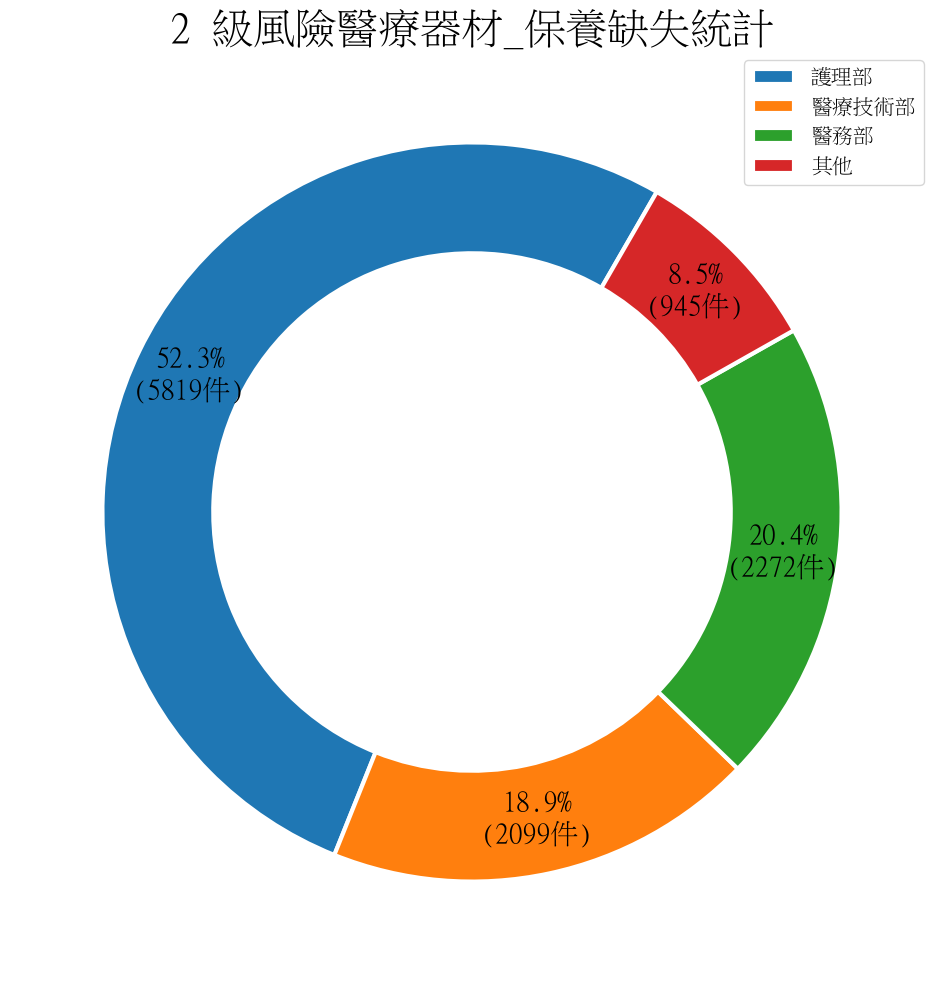

3級醫材：各部門保養缺失數量：
{'醫療技術部': 261, '護理部': 230, '醫務部': 198, '健康發展處': 12}

3級醫材共有701件保養紀錄缺失


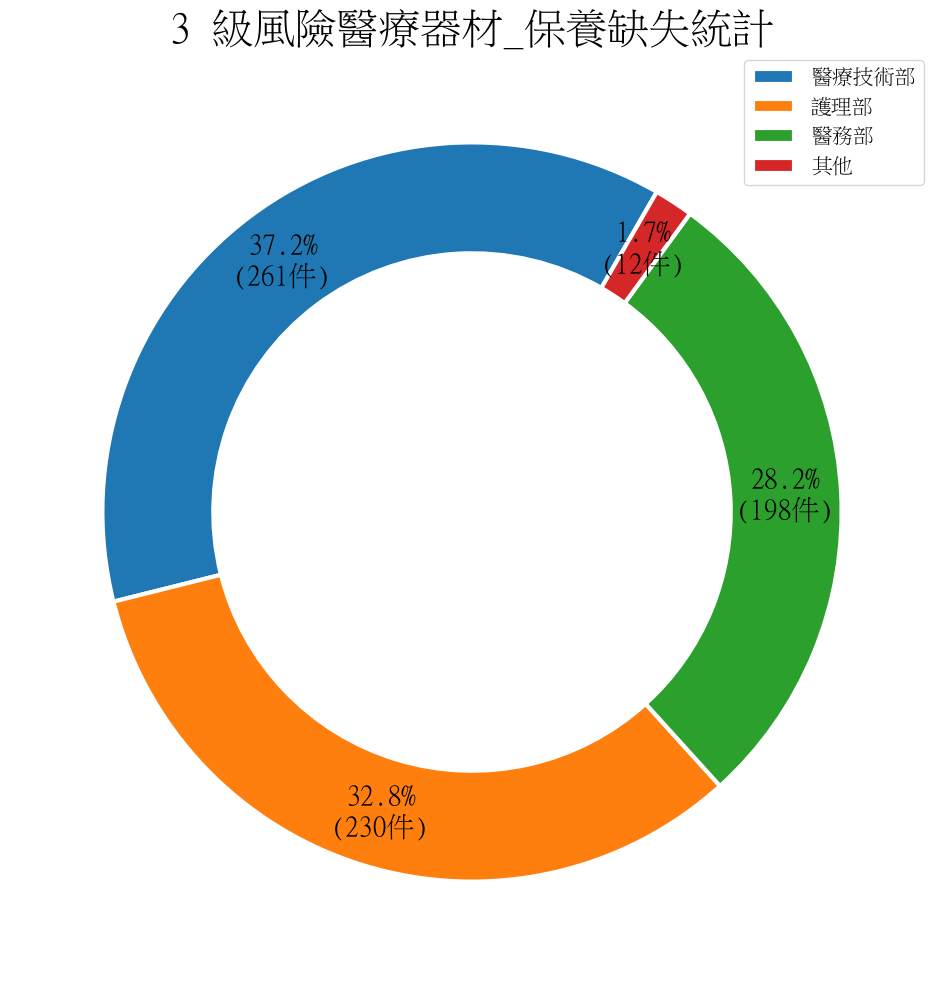

In [163]:
plot_maintenance_results(maintain_onlyrank_dept, risk_level=1) # 一級
plot_maintenance_results(maintain_onlyrank_dept, risk_level=2) # 一級
plot_maintenance_results(maintain_onlyrank_dept, risk_level=3) # 一級

In [79]:
maintain_onlyrank_dept['風險等級'].value_counts()

風險等級
2.0    11135
1.0     5270
3.0      701
Name: count, dtype: int64